### Importing Libaray and Modules

In [1]:
## Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Creating functions for code modularity

In [2]:
# Function to calcualte VIF 
def GetVIF(X):
  vif = pd.DataFrame()
  #X = X.drop(['const'], axis=1)
  vif['Features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif

# Function to create linear regession model and fit it.
def GetLinearRegression(X_train, y_train):
    # Add a constant
    X_train_lm = sm.add_constant(X_train)
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    return lr

## Reading and Understanding Data

In [3]:
## Read bikesharing data from .csv file
df_bikesusage = pd.read_csv("day.csv")
df_bikesusage.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Understand the number of rows and columns in the dataframe
df_bikesusage.shape

(730, 16)

In [5]:
# Understand non null value count and datatype of each column
df_bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
## Get Summary statistics
df_bikesusage.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


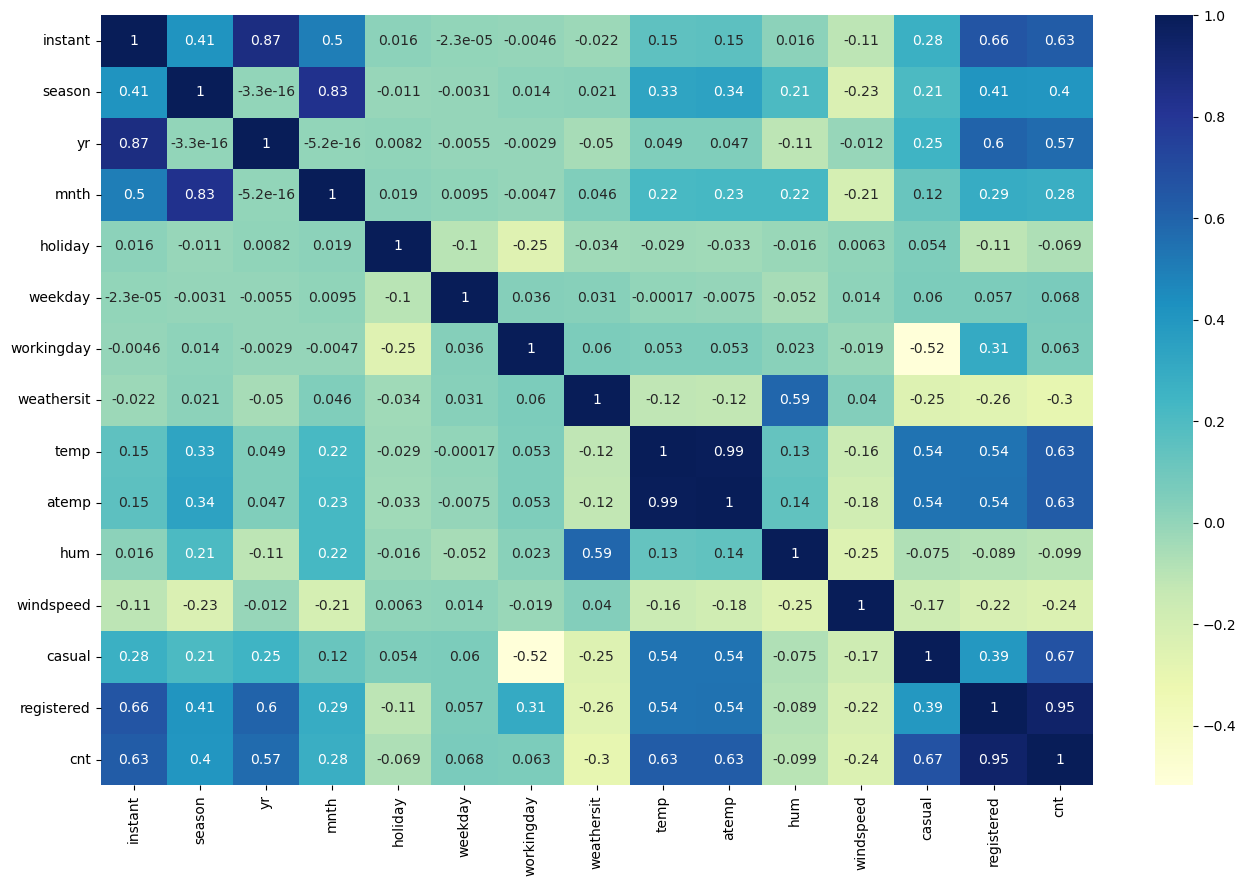

In [7]:
## Understand Correlation of numeric variables

plt.figure(figsize = (16, 10))
sns.heatmap(df_bikesusage.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Data Preparation - 1

### Inference from data understanding step

#### 1)     Removing variables that are not required to solve this usecase
    ##### temp and atemp variables are highly correlated. Hence, one of them can be removed.
    ##### dteday variable information is duplicated as the month and year information is available in mnth and yr variables
    ##### Considering cnt variable is the target variable, other variables like casual and registered are not required in the dataset for this proble

#### 2)    Unordered Variable Mapping
    ##### Variables like season, yr, weathersit, weekday, mnth are represented as numerical values but do not represent any order.Hence these variables are mapped to a string value to derive categorical variables later

In [8]:
## Drop Columns that are not required

df_bikesusage = df_bikesusage.drop(['instant','dteday','casual','registered','atemp'], axis=1)

In [9]:
# Defining the map function to map unordered numeric variables to respective string descriptions

def MapSeasons(x):
    return x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

def MapYear(x):
    return x.map({0:2018, 1:2019})

def MapWeathersit(x):
    return x.map({1:'Clear', 2:'Mist', 3:'LightRain', 4:'HeavyRain'})

def MapWeekday(x):
    return x.map({0:'0-Sun', 1:'1-Mon', 2:'2-Tue', 3:'3-Wed', 4:'4-Thu', 5:'5-Fri', 6:'6-Sat'})

def MapMonths(x):
    return x.map({1:'01-Jan', 2:'02-Feb', 3:'03-Mar', 4:'04-Apr', 5:'05-May', 6:'06-Jun', 7:'07-Jul', 8:'08-Aug', 9:'09-Sep', 10:'10-Oct', 11:'11-Nov', 12:'12-Dec'})

def MapBinary(x):
    return x.map({'yes': 1, "no": 0})


In [10]:
#Applying map functions to convert numeric values to strings

df_bikesusage[['season']] = df_bikesusage[['season']].apply(MapSeasons)
df_bikesusage[['mnth']] = df_bikesusage[['mnth']].apply(MapMonths)
df_bikesusage[['weekday']] = df_bikesusage[['weekday']].apply(MapWeekday)
df_bikesusage[['weathersit']] = df_bikesusage[['weathersit']].apply(MapWeathersit)
df_bikesusage.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,01-Jan,0,6-Sat,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,01-Jan,0,0-Sun,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,01-Jan,0,1-Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,01-Jan,0,2-Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,01-Jan,0,3-Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [11]:
## Understanding changed data and datatypes
df_bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Visualizing the data

### Visualising Numerical Variables

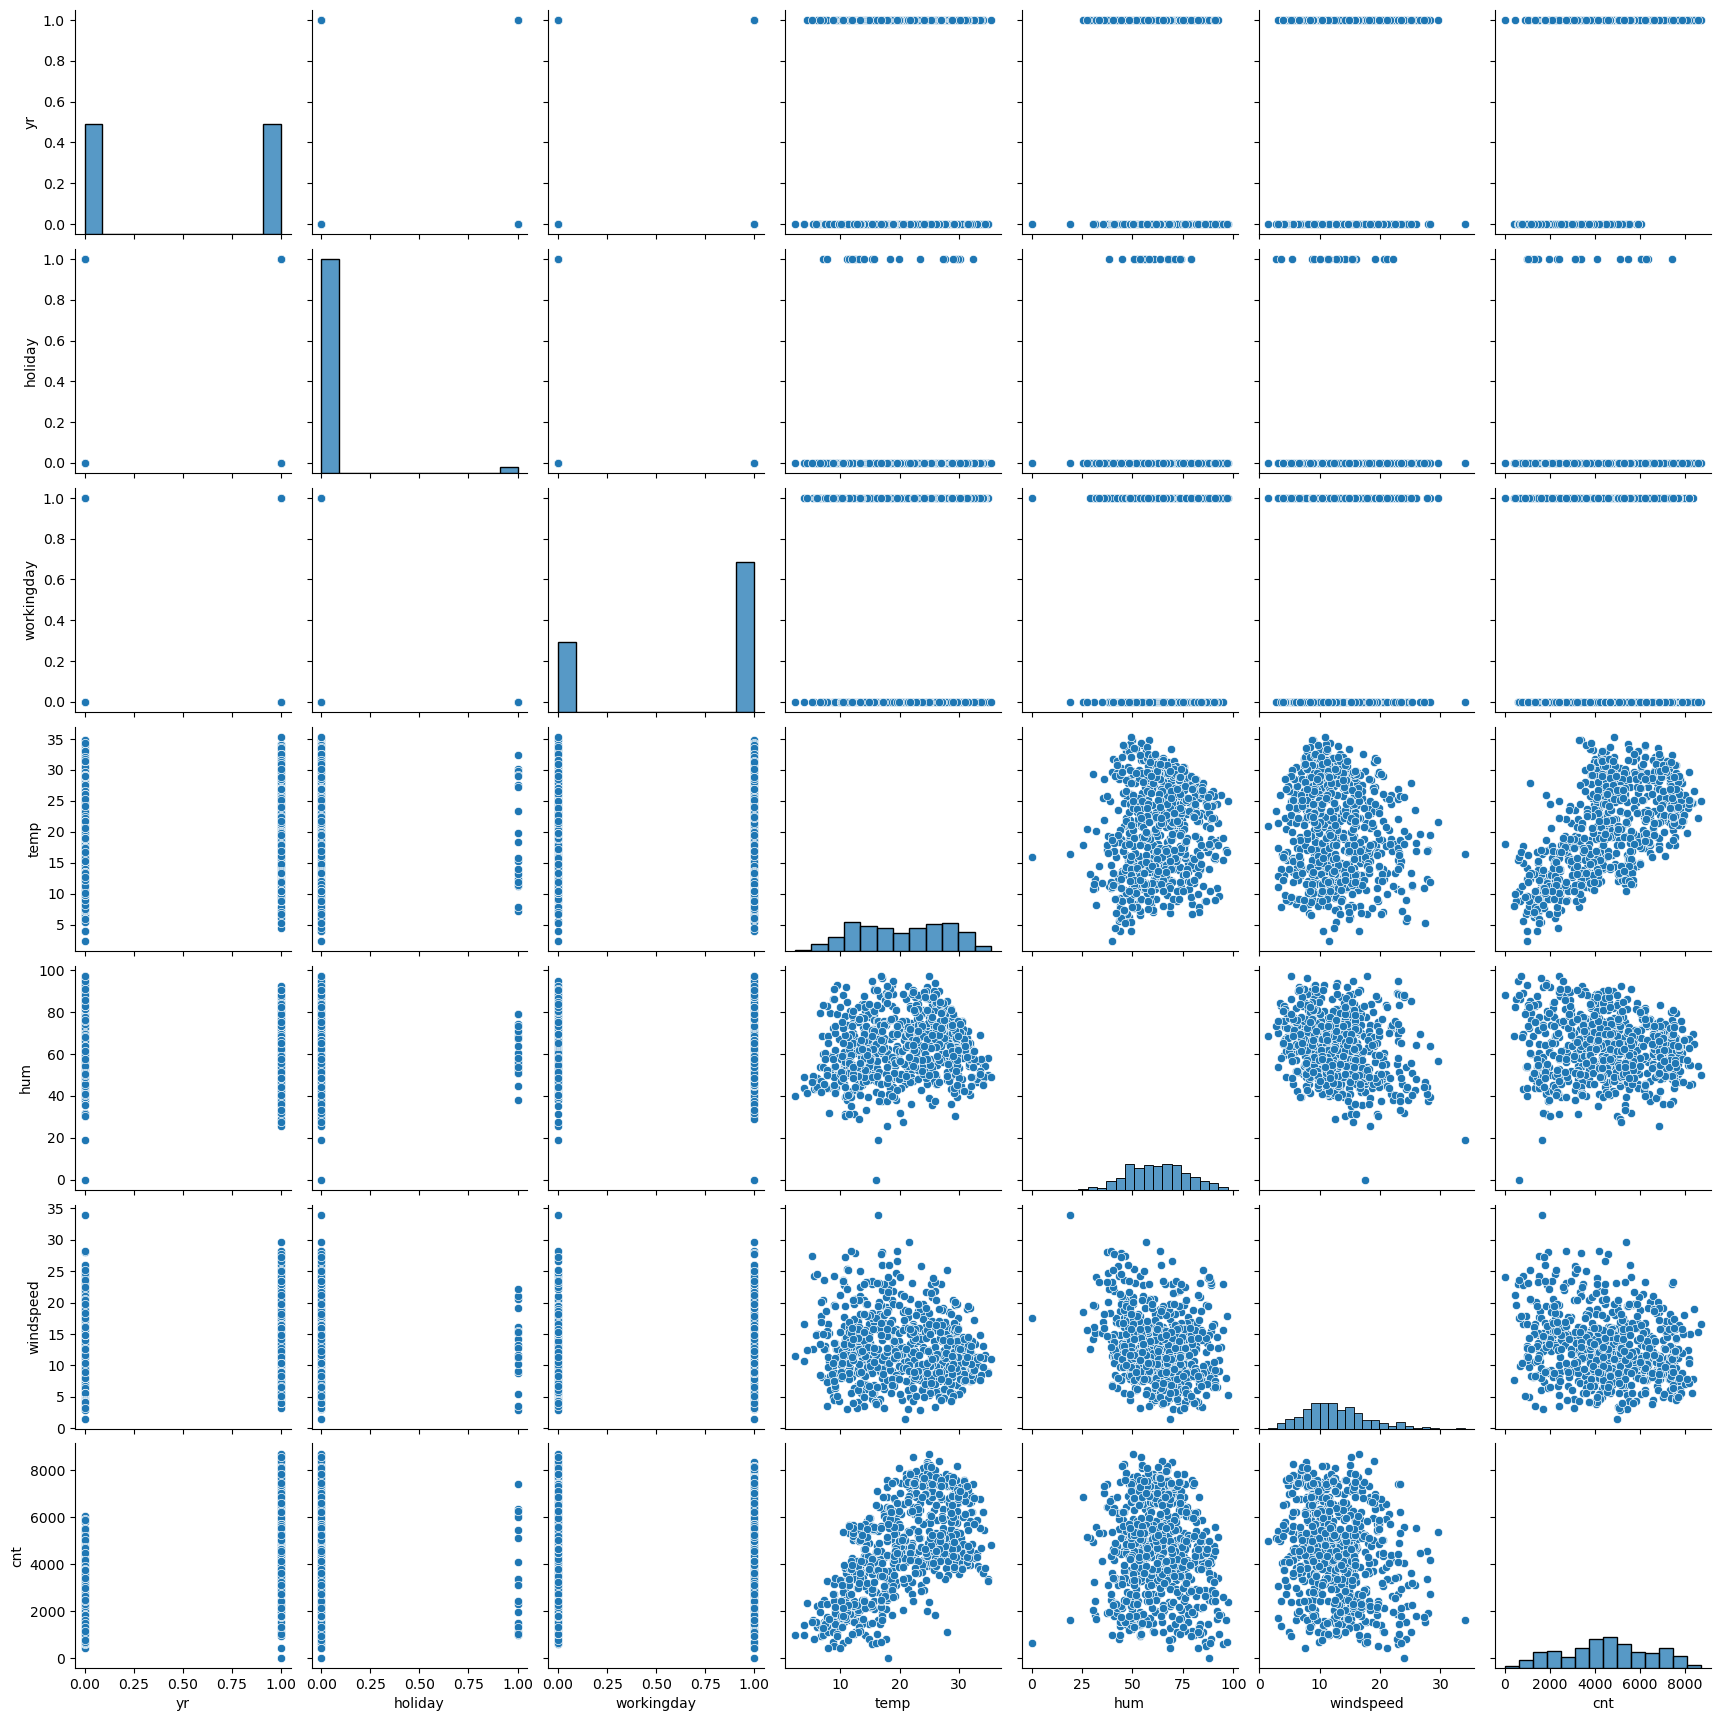

In [12]:
## Using seaborn pairplot to understand the distribution of numeric variable data
sns.pairplot(df_bikesusage)
plt.show()

#### Inference
##### - temp variable appears to have a positive correlation against the target variable 'cnt' 
##### - yr, holiday, workingday appears to have categorical data (0,1 etc) and not numeric continuous data

### Visualising Categorical Variables

##### From the previous visualisation, we know that yr, mnth, holiday, weekday, workingday are all categorical variables represented as numbers


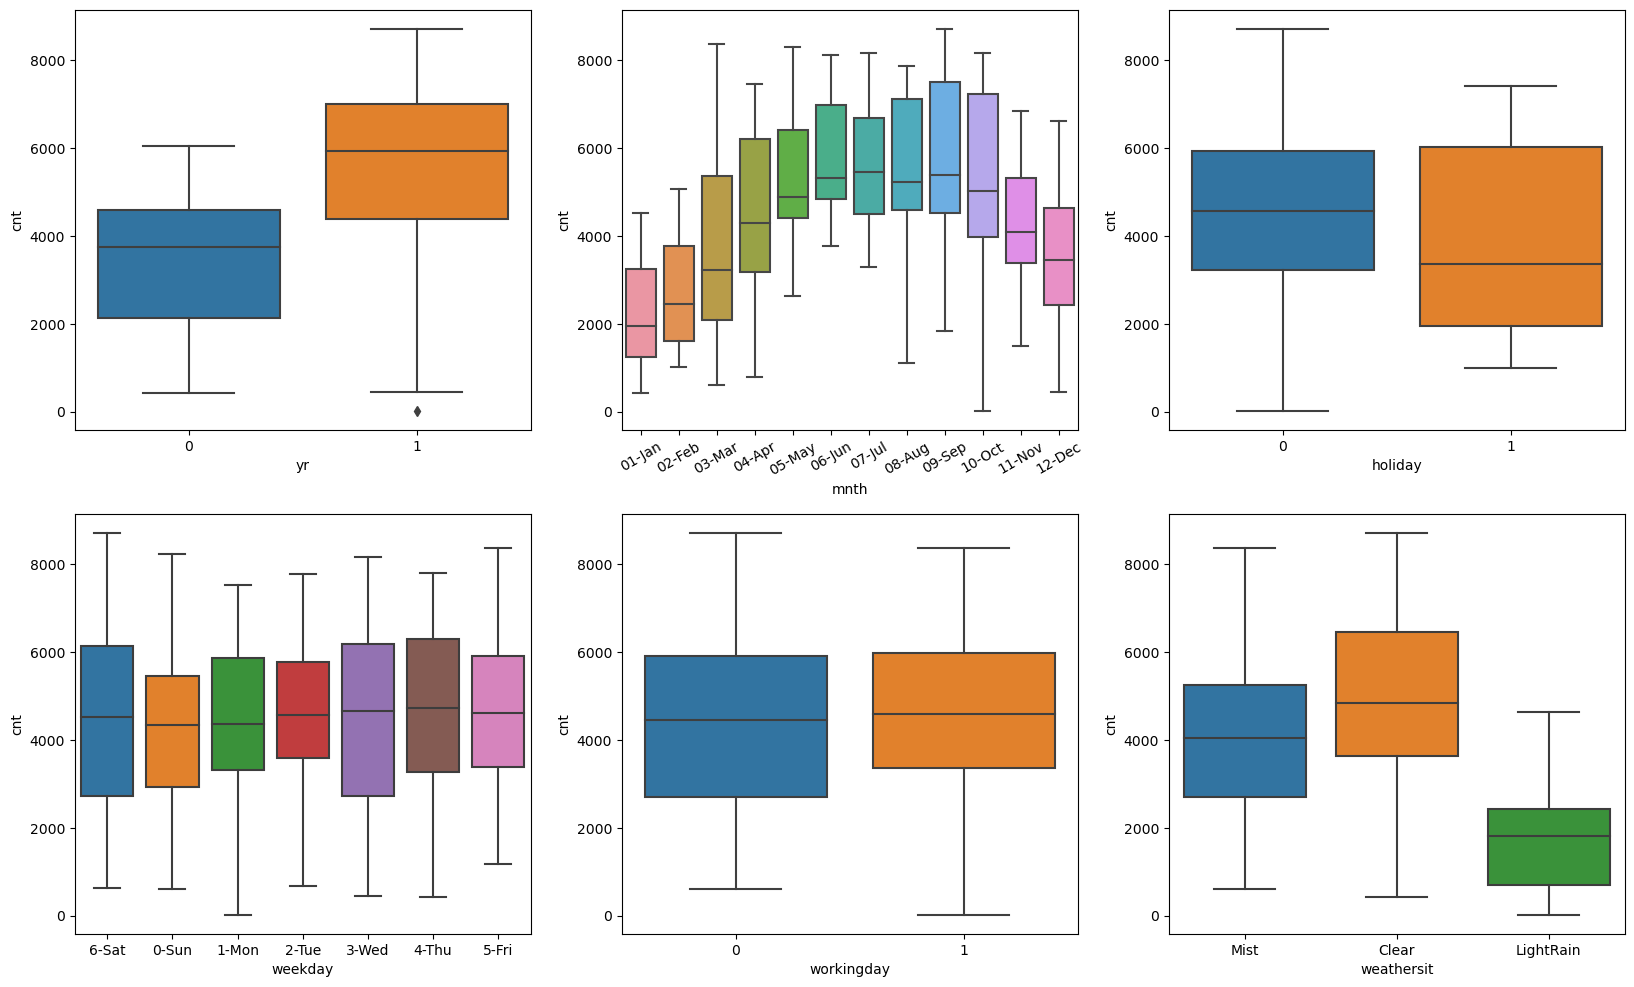

In [13]:
## Represent categorical variables using boxplot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bikesusage)
plt.subplot(2,3,2)
ax = sns.boxplot(x = 'mnth', y = 'cnt', data = df_bikesusage)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bikesusage)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bikesusage)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bikesusage)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bikesusage)
plt.show()

### Inference
    ##### - 2019 has a significantly higher number of rentals compared to 2018
    ##### - Months June, July, August, September have higher rentals compared to other months
    ##### - Rentals are higher on a non-holiday days
    ##### - No significant difference in median values across the days of the week
    ##### - No significant difference in median values across working day or holiday
    ##### - Higher level of rental on clear days

## Data Preparation for Linear Regression

### Creating Dummy Variables
    ##### For categorical variables represented using string values, dummy variables will need to be created to represent them as numeric variables

In [14]:
df_mnth = pd.get_dummies(df_bikesusage['mnth'], drop_first = True)
df_season = pd.get_dummies(df_bikesusage['season'], drop_first = True)
df_weathersit = pd.get_dummies(df_bikesusage['weathersit'], drop_first = True)
df_weekday = pd.get_dummies(df_bikesusage['weekday'], drop_first = True)
print("Month Dataframe")
print("")
print(df_mnth.head())
print("")
print("Season Dataframe")
print("")
print(df_season.head())
print("")
print("Weather Situation Dataframe")
print("")
print(df_weathersit.head())
print("")
print("Weekday Dataframe")
print("")
print(df_weekday.head())

Month Dataframe

   02-Feb  03-Mar  04-Apr  05-May  06-Jun  07-Jul  08-Aug  09-Sep  10-Oct  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   11-Nov  12-Dec  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

Season Dataframe

   Spring  Summer  Winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

Weather Situation Dataframe

   LightRain  Mist
0          0     1
1          0     1
2          0     0
3          0     0
4          0     0

Weekday Dataframe

   1-Mon  2-Tue  3-Wed  4-Thu  5-Fri  6-Sat
0      0      0  

In [15]:
# Add the results to the original df_bikesusage dataframe

df_bikesusage = pd.concat([df_bikesusage, df_mnth, df_season, df_weathersit, df_weekday], axis = 1)
df_bikesusage.shape

(730, 33)

In [16]:
# Remove columns mnth, season, weathersit and weekday as corresponding dummy variables have been created
df_bikesusage = df_bikesusage.drop(['mnth','season','weathersit','weekday'], axis=1)
df_bikesusage.shape

(730, 29)

In [17]:
# Understanding the dataset schema

df_bikesusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   02-Feb      730 non-null    uint8  
 8   03-Mar      730 non-null    uint8  
 9   04-Apr      730 non-null    uint8  
 10  05-May      730 non-null    uint8  
 11  06-Jun      730 non-null    uint8  
 12  07-Jul      730 non-null    uint8  
 13  08-Aug      730 non-null    uint8  
 14  09-Sep      730 non-null    uint8  
 15  10-Oct      730 non-null    uint8  
 16  11-Nov      730 non-null    uint8  
 17  12-Dec      730 non-null    uint8  
 18  Spring      730 non-null    uint8  
 19  Summer      730 non-null    u

In [18]:
df_bikesusage.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,02-Feb,03-Mar,04-Apr,...,Summer,Winter,LightRain,Mist,1-Mon,2-Tue,3-Wed,4-Thu,5-Fri,6-Sat
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Splitting the Data into Training and Testing Sets

In [19]:
## Split the dataset into train and test datasets 

from sklearn.model_selection import train_test_split

np.random.seed(0)
df_bikesusage_train, df_bikesusage_test = train_test_split(df_bikesusage, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
## Print shapes of train and test datasets

print("Train Dataset Shape: ")
print(df_bikesusage_train.shape)
print("Test Dataset Shape: ")
print(df_bikesusage_test.shape)

Train Dataset Shape: 
(510, 29)
Test Dataset Shape: 
(219, 29)


### Rescaling the Features 

In [21]:
## Understanding the latest view of data

df_bikesusage_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,02-Feb,03-Mar,04-Apr,...,Summer,Winter,LightRain,Mist,1-Mon,2-Tue,3-Wed,4-Thu,5-Fri,6-Sat
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,0,...,0,1,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [22]:
## For this usecase, we will use normalization technique for scaling. All values will be limited between 0 and 1. 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
### Based on the latest view of the dataset, temp, hum, windspeed and the target variable cnt will be required to be scaled

In [24]:
## Scaling 
numeric_variables = ['temp', 'hum', 'windspeed', 'cnt']
df_bikesusage_train[numeric_variables] = scaler.fit_transform(df_bikesusage_train[numeric_variables])

In [25]:
## Summary statistics to check if scaling has been applied

df_bikesusage_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,02-Feb,03-Mar,04-Apr,...,Summer,Winter,LightRain,Mist,1-Mon,2-Tue,3-Wed,4-Thu,5-Fri,6-Sat
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.066667,0.098039,0.078431,...,0.245098,0.24902,0.029412,0.343137,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.249689,0.297660,0.269113,...,0.430568,0.43287,0.169124,0.475223,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


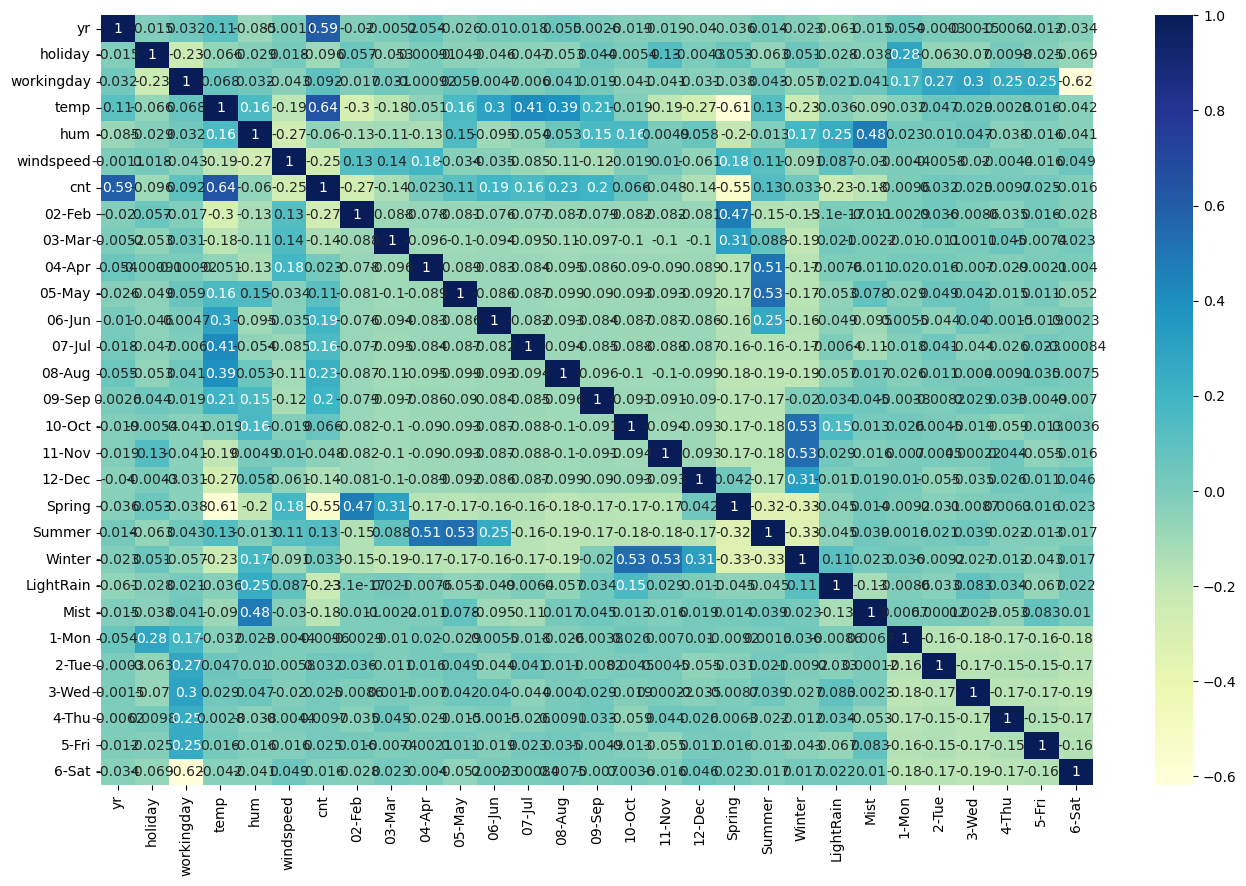

In [26]:
## Plotting a correlation plot to understand how the variables are correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_bikesusage_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing the training dataset into x and y datasets
    ##### y_train dataset will include only the target variable cnt
    ##### X_train dataset will include all other (independent) variables

In [27]:
y_train_bikesusage = df_bikesusage_train.pop('cnt')
X_train_bikesusage = df_bikesusage_train

### Using Recursive Feature Elimination (RFE) to optimise the list of features to be included in the model 

In [28]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train_bikesusage, y_train_bikesusage)
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train_bikesusage, y_train_bikesusage)
list(zip(X_train_bikesusage.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('02-Feb', False, 6),
 ('03-Mar', True, 1),
 ('04-Apr', True, 1),
 ('05-May', True, 1),
 ('06-Jun', True, 1),
 ('07-Jul', False, 7),
 ('08-Aug', True, 1),
 ('09-Sep', True, 1),
 ('10-Oct', False, 2),
 ('11-Nov', False, 8),
 ('12-Dec', False, 9),
 ('Spring', True, 1),
 ('Summer', False, 5),
 ('Winter', True, 1),
 ('LightRain', True, 1),
 ('Mist', True, 1),
 ('1-Mon', False, 10),
 ('2-Tue', False, 11),
 ('3-Wed', False, 13),
 ('4-Thu', False, 14),
 ('5-Fri', False, 12),
 ('6-Sat', False, 3)]

In [30]:
## Identifying features suggested by RFE 
selectedfeatures = X_train_bikesusage.columns[rfe.support_]
selectedfeatures

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', '03-Mar', '04-Apr',
       '05-May', '06-Jun', '08-Aug', '09-Sep', 'Spring', 'Winter', 'LightRain',
       'Mist'],
      dtype='object')

In [31]:
## Identifying features not suggested by RFE
X_train_bikesusage.columns[~rfe.support_]

Index(['workingday', '02-Feb', '07-Jul', '10-Oct', '11-Nov', '12-Dec',
       'Summer', '1-Mon', '2-Tue', '3-Wed', '4-Thu', '5-Fri', '6-Sat'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics
    ##### Based on RFE method, the following features have been identified as most relevant 
    ##### ['yr', 'holiday', 'temp', 'hum', 'windspeed', '03-Mar', '04-Apr','05-May', '06-Jun', '08-Aug', '09-Sep', 'Spring',         ##### 'Winter', 'LightRain','Mist']
    ##### As the next step, we use a reduced dataset limited to the above identified columns to train the linear model

In [32]:
# importing Stats Model python module
import statsmodels.api as sm  

# Creating a dataframe with RFE selected variables
X_train_bikesusage = X_train_bikesusage[selectedfeatures] 

# Running the linear model
lm_statsmodel = GetLinearRegression(X_train_bikesusage, y_train_bikesusage)

In [33]:
# Understanding the summary of the linear model training output

print(lm_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          9.99e-188
Time:                        15:35:21   Log-Likelihood:                 511.20
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     494   BIC:                            -922.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2867      0.034      8.537      0.0

### Inference
    ##### 1) R-Squared value is 0.843 and Adjusted R-squared value is 0.839. 
    #####    This means that 84.3% or 83.9% of the variance is explained by the predictor variables used in the model
    ##### 2) In Linear Regression, NULL hypothesis is that the value of all the coefficient is 0. P-value > 0.05 suggests 
    #####    the probability that the NULL hypothesis is true. p-values of all features are in acceptable range and suggests 
    #####    that the feature is statistically significant.


### Calculating VIF 

In [34]:
# Calculate the VIFs for the new model to check multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Calculation VIF
vif = GetVIF(X_train_bikesusage)
vif

,Features,VIF
3,hum,25.74
2,temp,16.09
4,windspeed,4.69
11,Spring,3.62
12,Winter,3.29
14,Mist,2.26
0,yr,2.09
9,08-Aug,1.93
7,05-May,1.77
6,04-Apr,1.69


### Inference
    ##### A high Variance Inflation Factor (VIF > 10) suggests that the feature has strong relationship with other features
    ##### From the above results, hum and temp features have higher values > 10

## Iteration - 2
    ##### In this step, hum feature will be removed from the training dataset and the model will be trained again
    ##### Understand summary statistics from the linear model and derive next steps

In [35]:
## Remove humidity as the VIF is significantly high

X_train_bikesusage = X_train_bikesusage.drop(['hum'], axis=1)

In [36]:
## Train Linear Regression Model

lm_statsmodel = GetLinearRegression(X_train_bikesusage, y_train_bikesusage)

## Understand Summary statistics

print(lm_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.23e-185
Time:                        15:35:21   Log-Likelihood:                 502.48
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2030      0.027      7.445      0.0

### Inference
    ##### 1) R-Squared value is 0.838 and Adjusted R-squared value is 0.833. 
    #####    This means that 83.8% or 83.3% of the variance is explained by the predictor variables used in the model 
    ##### 2) p-value of '08-Aug' is high (0.007)

### Calculating VIF

In [37]:
# Calculate the VIFs for the new model to check multicollinearity

vif = GetVIF(X_train_bikesusage)
vif

,Features,VIF
2,temp,6.49
3,windspeed,4.68
10,Spring,2.10
0,yr,2.08
11,Winter,1.94
8,08-Aug,1.91
7,06-Jun,1.65
6,05-May,1.59
13,Mist,1.55
5,04-Apr,1.53


### Inference
    ##### From the above results, temp features has higher value for VIF. This needs to be addressed.


## Iteration - 3
    ##### In this step, temp feature will be removed from the training dataset and the model will be trained again
    ##### Understand summary statistics from the linear model and derive next steps

In [38]:
## Remove temp as the VIF is significantly high

X_train_bikesusage = X_train_bikesusage.drop(['temp'], axis=1)

In [39]:
## Train Linear Regression Model

lm_statsmodel = GetLinearRegression(X_train_bikesusage, y_train_bikesusage)

## Understand Summary statistics

print(lm_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.90e-153
Time:                        15:35:22   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5082      0.018     28.983      0.0

### Inference
    ##### 1) R-Squared value is 0.779 and Adjusted R-squared value is 0.773. 
    #####    This means that 77.9% or 77.3% of the variance is explained by the predictor variables used in the model 
    ##### 2) In Linear Regression, NULL hypothesis is that the value of all the coefficient is 0. P-value > 0.05 suggests
    #####    the probability that the NULL hypothesis is true. 
    #####    From the above results, Winter and 04-Apr have very high p-values of 0.630 and 0.499 respectively 
    #####    This means that the NULL hypothesis is true and hence it can be removed

### Calculating VIF

In [40]:
# Calculate the VIFs for the new model to check multicollinearity

vif = GetVIF(X_train_bikesusage)
vif

,Features,VIF
2,windspeed,3.95
9,Spring,2.10
0,yr,1.90
10,Winter,1.80
12,Mist,1.54
4,04-Apr,1.48
5,05-May,1.32
3,03-Mar,1.31
7,08-Aug,1.31
6,06-Jun,1.24


### Inference
    ##### The VIF values of the features in this iteration are < 5 which is the acceptable range to retain the features 
    ##### in the model.
    

## Iteration - 4
    ##### Based on Iteration-3, we know that the p-values of winter and 4-Apr features are high. 
    ##### In this step, 
    ##### 1 - Winter feature will be removed from the training dataset
    ##### 2 - Train the model again
    ##### 3 - Understand summary statistics from the linear model and derive next steps

In [41]:
## Dropping winter from the dataset due to high p-value

X_train_bikesusage = X_train_bikesusage.drop(['Winter'], axis=1)

In [42]:
## Running a Linerar Model

lm_statsmodel = GetLinearRegression(X_train_bikesusage, y_train_bikesusage)

## Understand Summary statistics

print(lm_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.54e-154
Time:                        15:35:22   Log-Likelihood:                 423.26
No. Observations:                 510   AIC:                            -820.5
Df Residuals:                     497   BIC:                            -765.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5028      0.013     37.431      0.0

### Inference
    ##### The feature 04-Apr has a high p-value


### Calculating VIF

In [43]:
# Calculate the VIFs for the new model to check multicollinearity

vif = GetVIF(X_train_bikesusage)
vif

,Features,VIF
2,windspeed,3.06
0,yr,1.79
9,Spring,1.73
11,Mist,1.46
4,04-Apr,1.28
3,03-Mar,1.27
5,05-May,1.19
7,08-Aug,1.19
6,06-Jun,1.15
8,09-Sep,1.15


### Inference
    ##### VIF values for all features are < 5. No further action required.

## Iteration - 5
    ##### Based on Iteration-4, we know that the p-value of 4-Apr feature is high. 
    ##### In this step, 
    ##### 1 - 04-Apr feature will be removed from the training dataset
    ##### 2 - Train the model again
    ##### 3 - Understand summary statistics from the linear model and derive next steps

In [44]:
## Dropping 04-Apr feature as it has high p-value
X_train_bikesusage = X_train_bikesusage.drop(['04-Apr'], axis=1)

In [45]:
## Running the linear regression model

lm_statsmodel = GetLinearRegression(X_train_bikesusage, y_train_bikesusage)

## Understanding summary statistics

print(lm_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.10e-155
Time:                        15:35:22   Log-Likelihood:                 423.13
No. Observations:                 510   AIC:                            -822.3
Df Residuals:                     498   BIC:                            -771.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5020      0.013     37.671      0.0

### Inference
    ##### p-values of all the features are < 0.005. No further action required.

### Calculating VIF

In [46]:
# Calculate the VIFs for the new model to check multicollinearity

vif = GetVIF(X_train_bikesusage)
vif

,Features,VIF
2,windspeed,2.63
0,yr,1.77
8,Spring,1.62
10,Mist,1.45
3,03-Mar,1.26
4,05-May,1.15
6,08-Aug,1.15
5,06-Jun,1.12
7,09-Sep,1.12
9,LightRain,1.07


### Inference
    ##### VIF of all features within < 5. No further action required.

## Residual Analysis of the trained data
    ##### The model is now trained with the optimum set of features considered
    ##### As part of this step, the model will be evaluated for the linear regression model assumptions around error terms 
    ##### mean and variance and the relationship between the predictors

In [47]:
#### As the first step, run the predictions against the training data

X_train_bikesusage = sm.add_constant(X_train_bikesusage)
y_train_pred = lm_statsmodel.predict(X_train_bikesusage)


Text(0.5, 0, 'Errors')

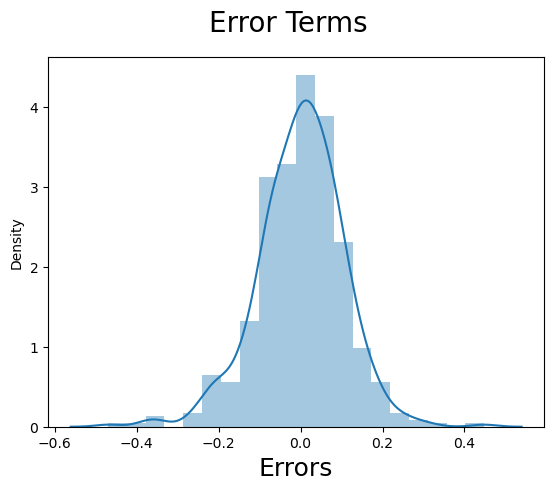

In [48]:
# Plot histogram of the error terms

fig = plt.figure()
sns.distplot((y_train_bikesusage - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

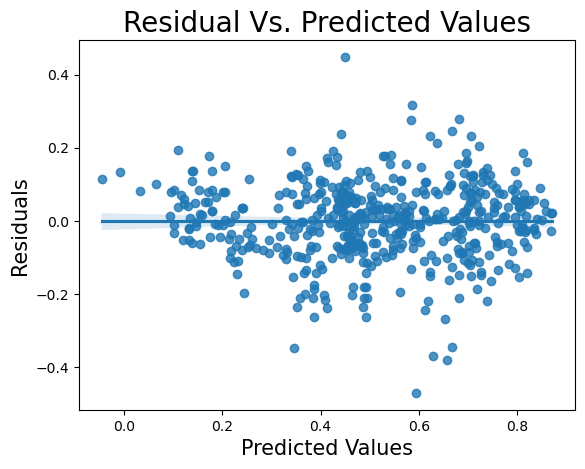

In [49]:
# Plot residuals against the predicted values

sns.regplot(x=y_train_pred, y=(y_train_bikesusage - y_train_pred))
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

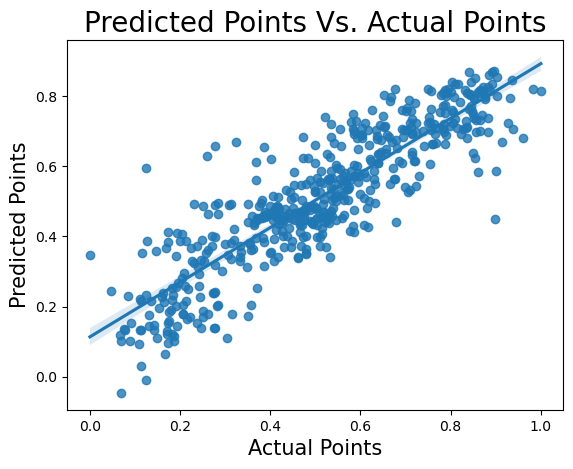

In [50]:
# Plot the predicted value against Actual data

sns.regplot(x=y_train_bikesusage, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

## Inference

    ##### 1) By plotting predicted values against actual data, we see that the data points are fitted around 
    #####    the best fitted line except a very few exceptions. Hence, we infer that the model is a reasonably good model
    ##### 2) Based on residual analysis, we are able to validate some of the assumptions made for linear regression model
    #####    2.1 - Error Terms distribution Plot - The error terms are normally distributed with a mean 0.
    #####    2.2 - Residuals vs Predicted Values Scatter Plot - 
    #####          2.2.1 This visual helps ascertain the variance with the residual values. As can be seen from the visual,
    #####                the residual values are distributed around the horizontal line indicating reasonably constant 
    #####                variance across all the residual values
    #####          2.2.2 From the visual, it is noticed that the residual values are spread across the length of the x-axis    
    #####                suggesting that there is no visible pattern with respect to the residuals. This ascertains that 
    #####                the error terms are independent of each other
    

## Conclusion

#### The model satisfies the Linear Regression Assumptions and can be used to make predictions
   


## Making Predictions

    #### In this step, test data set will be used against the trained model to predict values
    #### The test data will need to be prepared before passing it to the model

In [51]:
## Rescaling the test data using min max scaler

numeric_variables = ['temp', 'hum', 'windspeed', 'cnt']
df_bikesusage_test[numeric_variables] = scaler.fit_transform(df_bikesusage_test[numeric_variables])

df_bikesusage_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,02-Feb,03-Mar,04-Apr,...,Summer,Winter,LightRain,Mist,1-Mon,2-Tue,3-Wed,4-Thu,5-Fri,6-Sat
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.508750,0.418870,0.516216,0.100457,0.054795,0.091324,...,0.264840,0.232877,0.027397,0.319635,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,0.500722,0.188034,0.459904,0.249189,0.201253,0.188111,0.238702,0.301297,0.228100,0.288730,...,0.442259,0.423633,0.163612,0.467403,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.682487,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
## Divide the test dataset into X and Y datasets

y_test_bikesusage = df_bikesusage_test.pop('cnt')
X_train_bikesusage = X_train_bikesusage.drop(['const'],axis=1)
X_test_bikesusage = df_bikesusage_test[X_train_bikesusage.columns]

X_test_bikesusage.head()


,yr,holiday,windspeed,03-Mar,05-May,06-Jun,08-Aug,09-Sep,Spring,LightRain,Mist
184,0,1,0.149393,0,0,0,0,0,0,0,1
535,1,0,0.231142,0,0,1,0,0,0,0,0
299,0,0,0.443398,0,0,0,0,0,0,0,1
221,0,0,0.449707,0,0,0,1,0,0,0,0
152,0,0,0.682387,0,0,1,0,0,0,0,0


In [53]:
## Adding a constant variable 

X_test_bikesusage = sm.add_constant(X_test_bikesusage)

In [54]:
## Making predictions

y_test_pred = lm_statsmodel.predict(X_test_bikesusage)

### Model evaluation

Text(0, 0.5, 'y_pred')

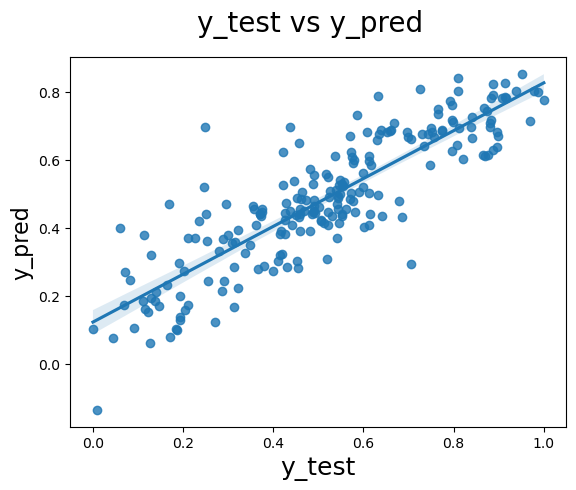

In [55]:
fig = plt.figure()
sns.regplot(x=y_test_bikesusage, y=y_test_pred)
#plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [56]:
## Finding the R2 score and the adjusted R2 score
from sklearn.metrics import r2_score

## Get R2 score for the test data
r2= r2_score(y_test_bikesusage, y_test_pred)

## Calculate Adjusted R2 score

#### Get number of rows in X_test_bikesusage dataset
n = X_test_bikesusage.shape[0]

#### Get number of features 
p = X_test_bikesusage.shape[1]

#### Use the Adjusted R2 formula to derive the value
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print("R2 Score =" ,r2)
print("Adjusted R2 Score =",adjusted_r2)

R2 Score = 0.7301673115935605
Adjusted R2 Score = 0.7144489025601757


In [57]:
print(lm_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.10e-155
Time:                        15:35:26   Log-Likelihood:                 423.13
No. Observations:                 510   AIC:                            -822.3
Df Residuals:                     498   BIC:                            -771.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5020      0.013     37.671      0.0

## Conclusion

### In the last step, we attempted to use the model to predict the target variable from the test data

#### From the scatter plot, we can see that the majority of the predicted values are along the best fit line. 
#### The Adjusted R2 Score of the train data is 0.774 or 77.4% 
#### The Adjusted R2 Score of the test data is 0.714 or 71.4%

### Best Fitter Line Equation

#### Best fitted Line - cnt = yr * 0.2477 + holiday * -0.0888 + windspeed * -0.1677 + 03-Mar * 0.0528 + 05-May * 0.0746 + 06-Jun * 0.0975 + 08-Aug * 0.1003 + 09-Sep * 0.1373 + Spring * -0.2324 + LihtRain * -0.2893 + Mist * -0.0946

### Feature Summary

#### 1) Year - With evey passing year, the demand is growing for bike rental. This coefficient of yr feature is 0.2477. This signifies that the demand   is expected to increast by 0.2477 with a unit increase in the yr value.
#### 2) Weather Situation - LightRain features depict a negative coefficient (-0.2893) suggesting that a demand is expected to decrease with an increase in unit value of these features. So, we can expect that the demand will decrease when there is light rain.
#### 3) Season - Sprint feature - has a negative coefficient (-0.2324) suggesting that the demand is expected to decrease when it is spring. 
#### 4) WindSpeed - windspeed has a negative coefficient (-0.1677) suggesting that the demand is expected to decrease with increase in windspeed

